# **🍽️ Restaurant Tips Analysis**

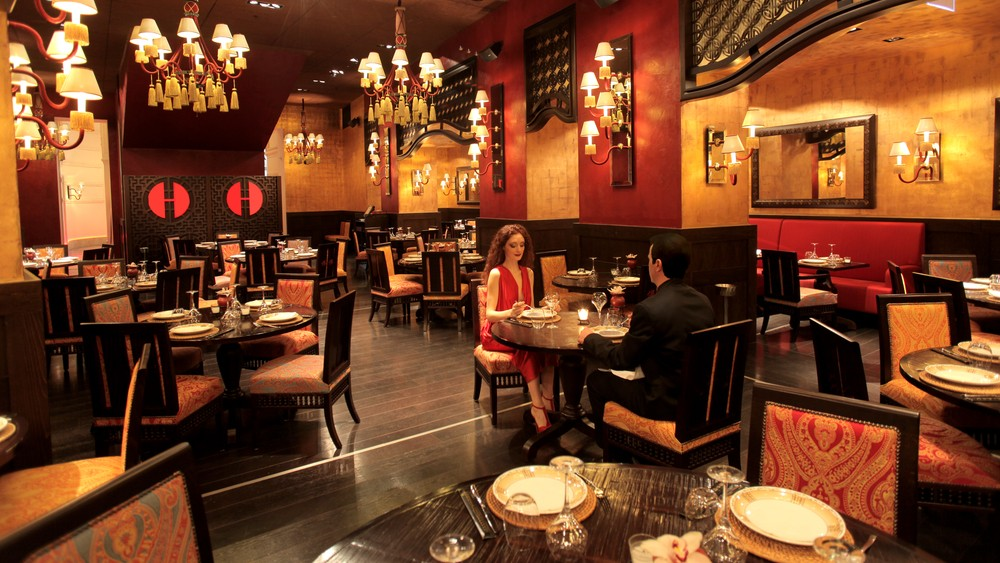

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [1]:
# PUT YOUR CODE HERE
import matplotlib.pyplot as plt
import pandas as pd

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [2]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [3]:
# PUT YOUR CODE HERE
df.head()


,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [4]:
# PUT YOUR CODE HERE
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

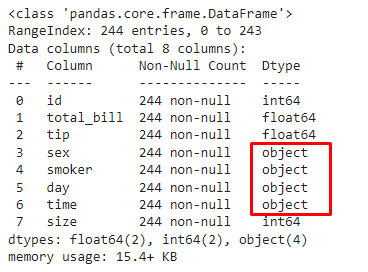

Let's fix their types and make them string:

In [5]:
# PUT YOUR CODE HERE
df=df.convert_dtypes()



Check again (output columns and their types):

In [6]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [7]:
# PUT YOUR CODE HERE
df.describe()


,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [8]:
# PUT YOUR CODE HERE
smokers_df=df[df['smoker']=='Yes']
smokers_df


,id,total_bill,tip,sex,smoker,day,time,size
56,56,38.01,3.0,Male,Yes,Sat,Dinner,4
58,58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,61,13.81,2.0,Male,Yes,Sat,Dinner,2
62,62,11.02,1.98,Male,Yes,Sat,Dinner,2
...,...,...,...,...,...,...,...,...
234,234,15.53,3.0,Male,Yes,Sat,Dinner,2
236,236,12.6,1.0,Male,Yes,Sat,Dinner,2
237,237,32.83,1.17,Male,Yes,Sat,Dinner,2
240,240,27.18,2.0,Female,Yes,Sat,Dinner,2


Check whether everything is okay. Output a test sample (5 random rows):

In [9]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
103,103,22.42,3.48,Female,Yes,Sat,Dinner,2
179,179,34.63,3.55,Male,Yes,Sun,Dinner,2
56,56,38.01,3.0,Male,Yes,Sat,Dinner,4
181,181,23.33,5.65,Male,Yes,Sun,Dinner,2
226,226,10.09,2.0,Female,Yes,Fri,Lunch,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [10]:
# PUT YOUR CODE HERE
non_smokers_df=df[df['smoker']=='No']
non_smokers_df

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.5,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
235,235,10.07,1.25,Male,No,Sat,Dinner,2
238,238,35.83,4.67,Female,No,Sat,Dinner,3
239,239,29.03,5.92,Male,No,Sat,Dinner,3
242,242,17.82,1.75,Male,No,Sat,Dinner,2


Check whether everything is okay. Output a test sample (5 random rows):

In [11]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)


,id,total_bill,tip,sex,smoker,day,time,size
89,89,21.16,3.0,Male,No,Thur,Lunch,2
33,33,20.69,2.45,Female,No,Sat,Dinner,4
54,54,25.56,4.34,Male,No,Sun,Dinner,4
19,19,20.65,3.35,Male,No,Sat,Dinner,3
118,118,12.43,1.8,Female,No,Thur,Lunch,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [12]:
# YOUR CODE
common_tip_min=df['tip'].min()
common_tip_max=df['tip'].max()
common_tip_mean=df['tip'].mean()
common_tip_median=df['tip'].median()


Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [13]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [14]:
# YOUR CODE
smokers_tip_min=smokers_df['tip'].min()
smokers_tip_max=smokers_df['tip'].max()
smokers_tip_mean=smokers_df['tip'].mean()
smokers_tip_median=smokers_df['tip'].median()


Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [15]:
# YOUR CODE

# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct



,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [16]:
# YOUR CODE
non_smokers_tip_min=non_smokers_df['tip'].min()
non_smokers_tip_max=non_smokers_df['tip'].max()
non_smokers_tip_mean=non_smokers_df['tip'].mean()
non_smokers_tip_median=non_smokers_df['tip'].median()


Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [17]:
# YOUR CODE

# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [18]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

  1. Insight 1
  - Measures of central tendency of smokers is nearby common than non-smokers.
    It seems that the smokers tip more than non-smokers.
  2. Insight 2
  - max tips is 10 USD.
  - min tips is 1 USD for both group.

**General conclusion:**
- Q: Who is the most infuence on tips value?
- A: **Smokers. **

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

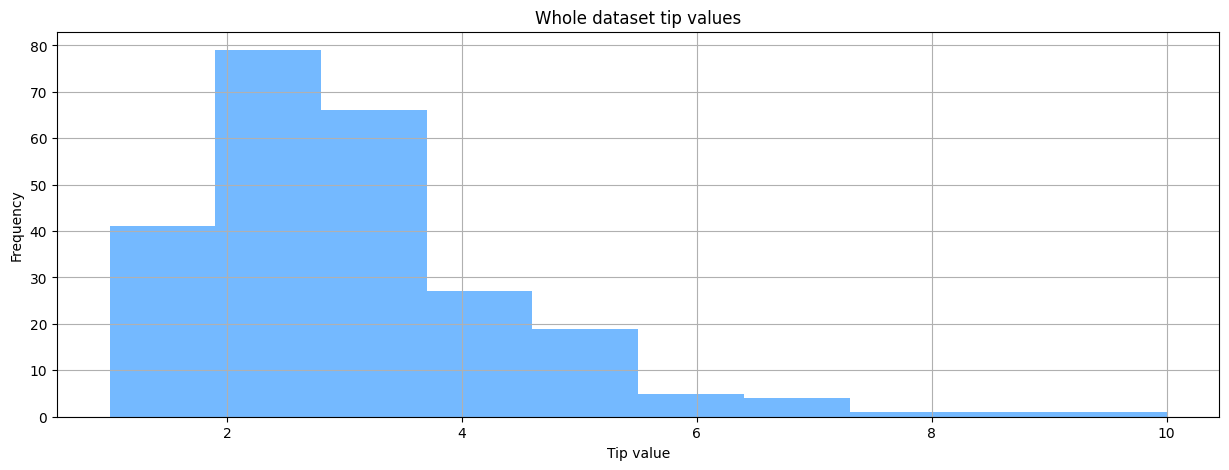

In [19]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df['tip'], color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

Text(0.5, 1.0, 'Smokers tip values')

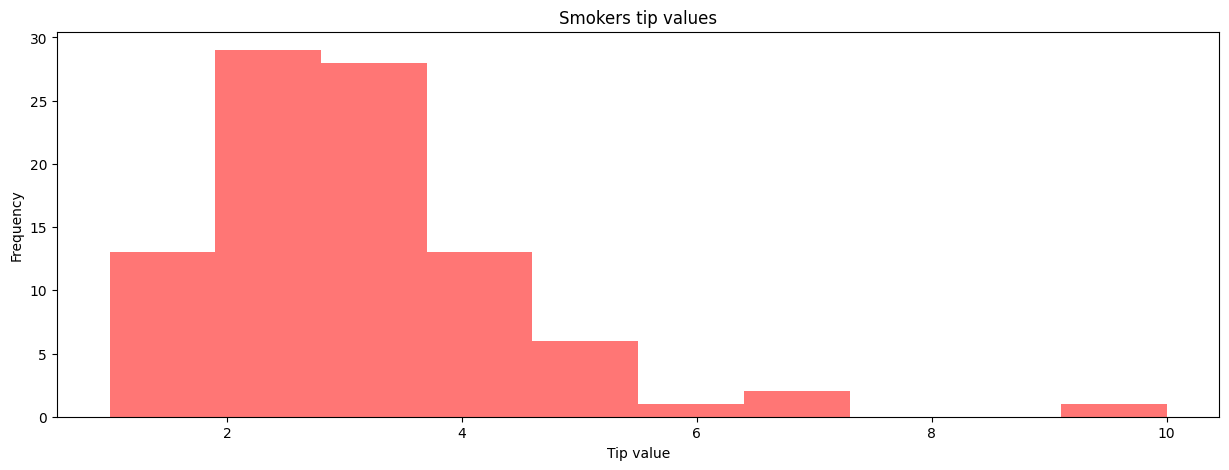

In [20]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(smokers_df['tip'], color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')




##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

Text(0.5, 1.0, 'Non-smokers tip values')

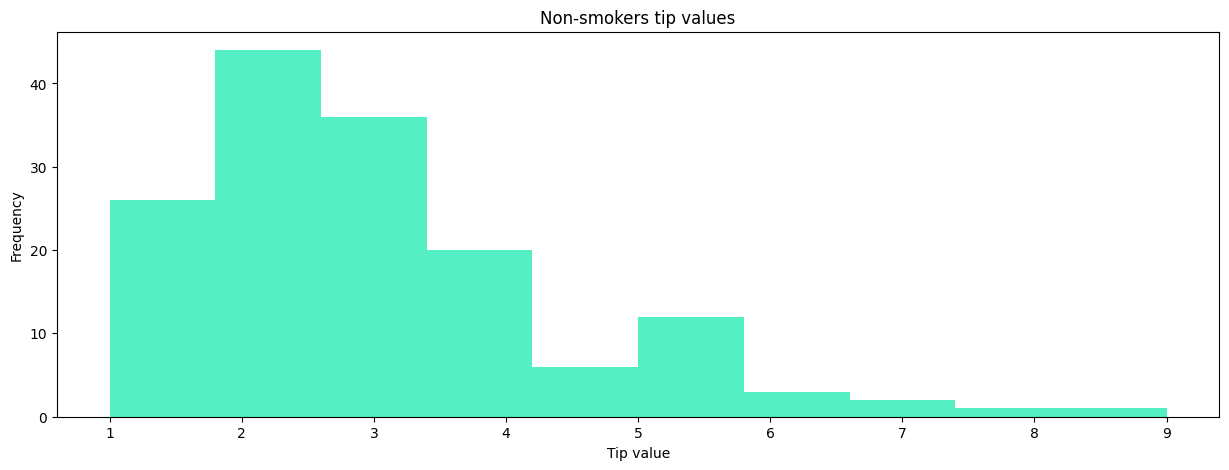

In [21]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(non_smokers_df['tip'], color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')


##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

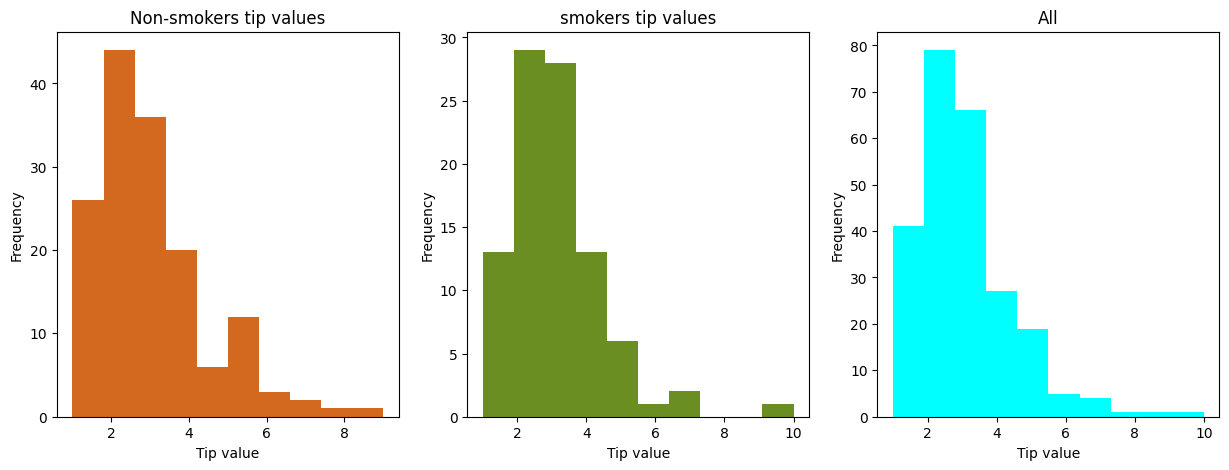

In [35]:
# YOUR CODE

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.hist(non_smokers_df['tip'], color='chocolate')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')

plt.subplot(1,3,2)
plt.hist(smokers_df['tip'], color='olivedrab')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('smokers tip values')

plt.subplot(1,3,3)
plt.hist(df['tip'], color='aqua')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('All')

plt.show()




##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

Insight
Max Tips value is closed to the middle.
**General conclusion:**
 Distribution histogram of non_smokers is the quite similar with general distribution.
 Non-smokers take majority of general dataset.
 So, we have no clear conclusion of effection to tips value.

### **👨👩 Do males give more tips?**

In [23]:
df_male=df[df['sex']=='Male']
df_female=df[df['sex']=='Female']
df_male
df_female

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
11,11,35.26,5.0,Female,No,Sun,Dinner,4
14,14,14.83,3.02,Female,No,Sun,Dinner,2
16,16,10.33,1.67,Female,No,Sun,Dinner,3
...,...,...,...,...,...,...,...,...
226,226,10.09,2.0,Female,Yes,Fri,Lunch,2
229,229,22.12,2.88,Female,Yes,Sat,Dinner,2
238,238,35.83,4.67,Female,No,Sat,Dinner,3
240,240,27.18,2.0,Female,Yes,Sat,Dinner,2


In [24]:
# male central tendency
male_tip_min=df_male['tip'].min()
male_tip_max=df_male['tip'].max()
male_tip_mean=df_male['tip'].mean()
male_tip_median=df_male['tip'].median()


In [25]:
# female central tendency
female_tip_min=df_female['tip'].min()
female_tip_max=df_female['tip'].max()
female_tip_mean=df_female['tip'].mean()
female_tip_median=df_female['tip'].median()

Perform the same steps based on the column **sex**.

In [26]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'male': {'min': male_tip_min, 'max': male_tip_max, 'mean': male_tip_mean, 'median': male_tip_median},
    'female': {'min': female_tip_min, 'max': female_tip_max, 'mean': female_tip_mean, 'median': female_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,male,female
min,1.000000,1.000000,1.000000
max,10.000000,10.000000,6.500000
mean,2.998279,3.089618,2.833448
median,2.900000,3.000000,2.750000


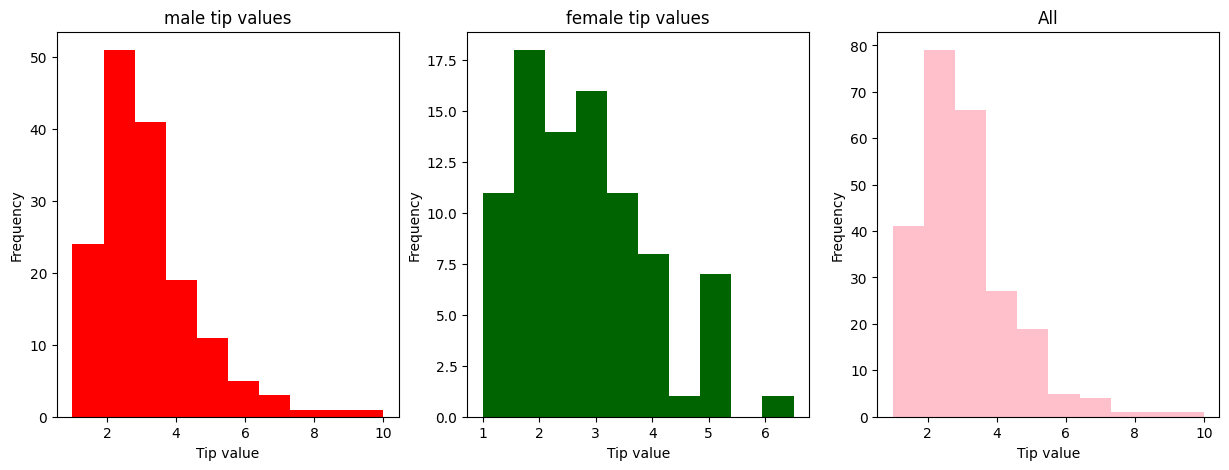

In [27]:
# YOUR CODE

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.hist(df_male['tip'], color='red')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('male tip values')

plt.subplot(1,3,2)
plt.hist(df_female['tip'], color='darkgreen')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('female tip values')

plt.subplot(1,3,3)
plt.hist(df['tip'], color='pink')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('All')

plt.show()


**Conclusion:**
- Based on the aboved histogram, number of males having tips are higher than female's. Exp: There are 40 males and 11 females, each tipping at a rate of 3 USD.

### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

In [28]:
df_weekend=df[(df['day']=='Sun')|(df['day']=='Sat')]
df_weekday=df[(df['day']!='Sun')&(df['day']!='Sat')]
df_weekend
df_weekday

,id,total_bill,tip,sex,smoker,day,time,size
77,77,27.2,4.0,Male,No,Thur,Lunch,4
78,78,22.76,3.0,Male,No,Thur,Lunch,2
79,79,17.29,2.71,Male,No,Thur,Lunch,2
80,80,19.44,3.0,Male,Yes,Thur,Lunch,2
81,81,16.66,3.4,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...,...
223,223,15.98,3.0,Female,No,Fri,Lunch,3
224,224,13.42,1.58,Male,Yes,Fri,Lunch,2
225,225,16.27,2.5,Female,Yes,Fri,Lunch,2
226,226,10.09,2.0,Female,Yes,Fri,Lunch,2


In [29]:
# weekday central tendency
weekend_tip_min=df_weekend['tip'].min()
weekend_tip_max= df_weekend['tip'].max()
weekend_tip_mean=df_weekend['tip'].mean()
weekend_tip_median=df_weekend['tip'].median()

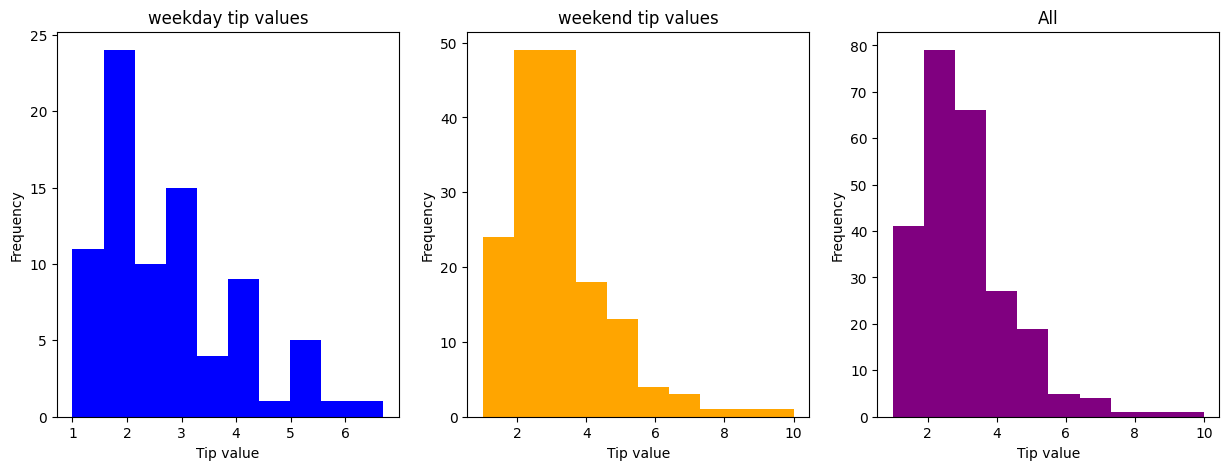

In [30]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.hist(df_weekday['tip'], color='blue')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('weekday tip values')

plt.subplot(1,3,2)
plt.hist(df_weekend['tip'], color='orange')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('weekend tip values')

plt.subplot(1,3,3)
plt.hist(df['tip'], color='purple')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('All')

plt.show()

**Conclusion:**
- Based on the above histogram, the number of customers who tipped at weekends is higher than at weekdays.

**Conclusion:**
- Based on the above histogram, the number of customers who tipped during dinner is higher than at other times.

### **🕑 Do dinners bring more tips?**

In [31]:
df_dinner=df[df['time']=='Dinner']
df_others=df[df['time']!='Dinner']
df_dinner
df_others

,id,total_bill,tip,sex,smoker,day,time,size
77,77,27.2,4.0,Male,No,Thur,Lunch,4
78,78,22.76,3.0,Male,No,Thur,Lunch,2
79,79,17.29,2.71,Male,No,Thur,Lunch,2
80,80,19.44,3.0,Male,Yes,Thur,Lunch,2
81,81,16.66,3.4,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...,...
222,222,8.58,1.92,Male,Yes,Fri,Lunch,1
223,223,15.98,3.0,Female,No,Fri,Lunch,3
224,224,13.42,1.58,Male,Yes,Fri,Lunch,2
225,225,16.27,2.5,Female,Yes,Fri,Lunch,2


In [32]:
# Time central tendency
dinner_tip_min=df_dinner['tip'].min()
dinner_tip_max= df_dinner['tip'].max()
dinner_tip_mean=df_dinner['tip'].mean()
dinner_tip_median=df_dinner['tip'].median()

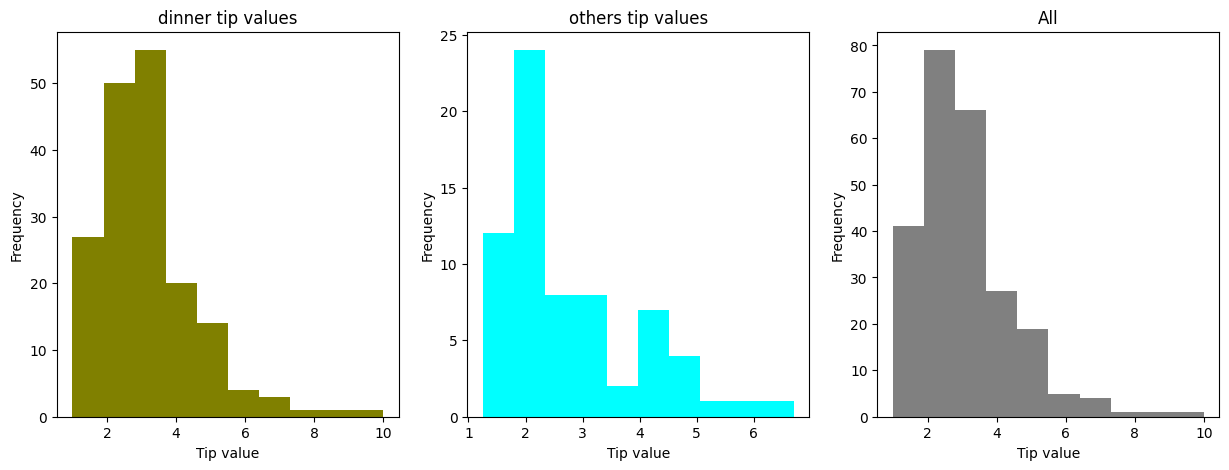

In [34]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.hist(df_dinner['tip'], color='olive')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('dinner tip values')

plt.subplot(1,3,2)
plt.hist(df_others['tip'], color='cyan')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('others tip values')

plt.subplot(1,3,3)
plt.hist(df['tip'], color='gray')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('All')

plt.show()

Perform the same steps based on the column **time**.

**Conclusion:**
- Based on the above histogram, the number of customers who tipped during dinner is higher than at other times.